# Dimensionality reduction using Multidimensional scaling

### 2D descriptor data

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold
import plotly.express as px
import molplotly

In [2]:
df_2D_desc_MDS = pd.read_csv (r'C:\documenten hier\2D_desc_ccr2.csv')
df_2D_desc_MDS.head()

,InChIKey,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,scaffold,smiles
0,AAMCCXZHVCUGJS-UHFFFAOYSA-N,13.717474,-5.012811,13.717474,0.004832,0.162680,727.775,692.495,727.241566,268,...,0,0,0,1,0,0,0,0,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,AANWVQVQZDEWDD-UHFFFAOYSA-N,12.265263,-0.608446,12.265263,0.123657,0.738889,360.369,344.241,360.111007,134,...,0,0,0,0,0,0,0,1,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,AAZMPANXGYITPF-UHFFFAOYSA-N,12.846593,-4.559210,12.846593,0.179124,0.578779,490.526,461.294,490.219175,188,...,0,0,0,0,0,0,0,0,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,ABHVKYFWPPHTHF-UHFFFAOYSA-N,14.455951,-4.513139,14.455951,0.027561,0.486918,625.689,583.353,625.308719,244,...,0,0,0,0,0,0,0,0,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,ABOSMIZKCHEJEN-UHFFFAOYSA-N,13.520089,-5.131106,13.520089,0.068672,0.387923,647.682,612.402,647.225247,242,...,1,0,0,0,0,0,0,0,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [3]:
features = list(df_2D_desc_MDS.columns.values)
features.remove('InChIKey')
features.remove('scaffold')
features.remove('smiles')

z = df_2D_desc_MDS.loc[ :,features].values # stores all values as numpy.ndarray
y = df_2D_desc_MDS.loc[:,['InChIKey']].values
data = pd.DataFrame(data = z, columns= features)
data.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.717474,-5.012811,13.717474,0.004832,0.162680,727.775,692.495,727.241566,268.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,12.265263,-0.608446,12.265263,0.123657,0.738889,360.369,344.241,360.111007,134.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12.846593,-4.559210,12.846593,0.179124,0.578779,490.526,461.294,490.219175,188.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.455951,-4.513139,14.455951,0.027561,0.486918,625.689,583.353,625.308719,244.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13.520089,-5.131106,13.520089,0.068672,0.387923,647.682,612.402,647.225247,242.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
scaler = StandardScaler()  # not sure if Standard scaler of minmaxScaler should be used, standardscaler seems to make the data more compact. 
data_scaled = scaler.fit_transform(data)

In [5]:
mds = MDS(n_components=2, dissimilarity="euclidean")
results = mds.fit_transform(data_scaled)
result_2 = mds.fit_transform(data)


In [6]:
print(results)
stress = mds.stress_
print(stress)


[[ -0.81398221  22.65669747]
 [-14.27997046 -11.58137083]
 [-23.88022408  10.97977824]
 ...
 [  3.55147671   1.67102294]
 [ -2.52532428   3.04951985]
 [ -1.42725439   6.12438011]]
1.292315849381405e+24


In [7]:
MDS_Df = pd.DataFrame(data = results
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
MDS_Df.head()

,component 1,component 2
0,-0.813982,22.656697
1,-14.279970,-11.581371
2,-23.880224,10.979778
3,15.365194,16.694055
4,-2.531803,13.568247


In [8]:
final_MDS_Df = pd.concat([MDS_Df, df_2D_desc_MDS[['InChIKey']], df_2D_desc_MDS[['scaffold']], df_2D_desc_MDS[['smiles']]], axis = 1)
final_MDS_Df ['scaffold'] = final_MDS_Df['scaffold'].astype(str)
final_MDS_Df ['smiles'] = final_MDS_Df['smiles'].astype(str)
final_MDS_Df.head(5)

,component 1,component 2,InChIKey,scaffold,smiles
0,-0.813982,22.656697,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,-14.279970,-11.581371,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,-23.880224,10.979778,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,15.365194,16.694055,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,-2.531803,13.568247,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


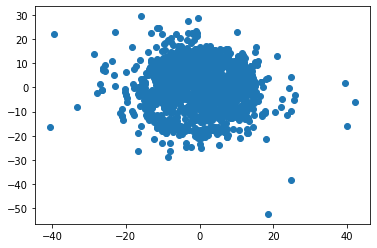

In [9]:
plt.scatter(results[:,0], results[:,1]) #first plot of data after scaling


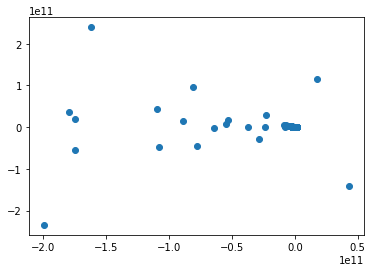

In [10]:
plt.scatter(result_2[:,0], result_2[:,1]) # plot of the data without scaling 

In [11]:
series = pd.value_counts(final_MDS_Df.scaffold)
mask = (series.lt(10))
final_MDS_Df['scaffold_grouped'] = np.where(final_MDS_Df['scaffold'].isin(series[mask].index),'Other',final_MDS_Df['scaffold'])


#### The following symbols will be used in all following scatterplots 

In [31]:
symbols = ['circle', 'square', 'diamond', 'cross', 'x',  'pentagon', 'hexagram', 'star',
           'diamond', 'hourglass', 'bowtie']

In [13]:
fig_2D_MDS = px.scatter(final_MDS_Df, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                    color_discrete_map= {'Other': 'lightgrey'},
                    title = 'MDS on 2D descriptor data after scaling',
                                      width=1200,
                                      height=800,
                       render_mode='SVG')
fig_2D_MDS.update_layout(plot_bgcolor='White')
#fig_2D_MDS.show()
app_scatter = molplotly.add_molecules(fig=fig_2D_MDS,
                                      df=final_MDS_Df,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9101, height=800)

In [14]:
df = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
df.head()

,Activity_ID,Quality,source,CID,SMILES,connectivity,InChIKey,InChI,InChI_AuxInfo,target_id,...,type_other,Activity_class,relation,pchembl_value,pchembl_value_Mean,pchembl_value_StdDev,pchembl_value_SEM,pchembl_value_N,pchembl_value_Median,pchembl_value_MAD
0,AAMCCXZHVCUGJS_on_P41597_WT,High,ChEMBL30,CHEMBL231340,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...,AAMCCXZHVCUGJS,AAMCCXZHVCUGJS-UHFFFAOYSA-N,InChI=1S/C37H35F6N5O2S/c1-23-21-48(15-12-35(23...,"""AuxInfo=1/1/N:1,50,49,36,37,51,35,48,45,6,44,...",P41597_WT,...,0,NaN,=,7.890,7.89,0.00,0.00,1.0,7.89,0.00
1,AANWVQVQZDEWDD_on_P41597_WT,Low,ChEMBL30,CHEMBL1688881,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,AANWVQVQZDEWDD,AANWVQVQZDEWDD-UHFFFAOYSA-N,InChI=1S/C21H16N2O4/c24-20(16-9-10-18-19(12-16...,"""AuxInfo=1/1/N:22,21,23,26,20,24,25,27,11,10,1...",P41597_WT,...,0,NaN,<,5.000,5.00,0.00,0.00,1.0,5.00,0.00
2,AAZMPANXGYITPF_on_P41597_WT,High,ChEMBL30,CHEMBL1290522,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,AAZMPANXGYITPF,AAZMPANXGYITPF-UHFFFAOYSA-N,"InChI=1S/C25H29F3N4O3/c26-25(27,28)18-6-4-5-17...","""AuxInfo=1/1/N:28,27,29,9,8,10,26,30,22,32,23,...",P41597_WT,...,0,NaN,=,6.190,6.19,0.00,0.00,1.0,6.19,0.00
3,ABHVKYFWPPHTHF_on_P41597_WT,High,ChEMBL30,CHEMBL3115111,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...,ABHVKYFWPPHTHF,ABHVKYFWPPHTHF-UHFFFAOYSA-N,InChI=1S/C30H42F3N5O6/c1-41-26-18-43-8-3-25(26...,"""AuxInfo=1/0/N:1,32,7,31,21,25,19,6,22,24,18,3...",P41597_WT,...,0,NaN,=,7.010; 7.390,7.20,0.19,0.19,2.0,7.20,0.19
4,ABOSMIZKCHEJEN_on_P41597_WT,High,ChEMBL30,CHEMBL1092748,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...,ABOSMIZKCHEJEN,ABOSMIZKCHEJEN-UHFFFAOYSA-N,InChI=1S/C30H35F6N3O4S/c1-18(2)38(3)23-9-10-26...,"""AuxInfo=1/1/N:1,3,5,41,40,42,39,43,7,8,12,11,...",P41597_WT,...,0,NaN,=,8.460,8.46,0.00,0.00,1.0,8.46,0.00


In [15]:
final_MDS_Df['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_mds_2 = px.scatter(final_MDS_Df, x="component 1", y="component 2",
                    color = "pchembl_value_Mean",
                    hover_data = None ,
                    labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    color_continuous_scale=["red",  "yellow", "green"],
                    title = 'MDS on 2D descriptor data after scaling',
                                      width=1000,
                                      height=800,
                      render_mode='SVG')
fig_mds_2.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_mds_2,
                                      df=final_MDS_Df,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9102, height=800)

# MDS on Morgan fingerprint data

In [16]:
df_morgan_MDS = pd.read_csv (r'C:\documenten hier\MorganFp_scaffold_ccr2_1024.csv')
df_morgan_MDS.head()

,InChIKey,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,scaffold
0,AAMCCXZHVCUGJS-UHFFFAOYSA-N,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...
1,AANWVQVQZDEWDD-UHFFFAOYSA-N,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1
2,AAZMPANXGYITPF-UHFFFAOYSA-N,0,0,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1
3,ABHVKYFWPPHTHF-UHFFFAOYSA-N,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...
4,ABOSMIZKCHEJEN-UHFFFAOYSA-N,0,1,1,0,0,1,0,0,0,...,1,0,0,0,1,0,0,1,0,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...


In [17]:
features_M = list(df_morgan_MDS.columns.values)
features_M.remove('InChIKey')
features_M.remove('scaffold')

a = df_morgan_MDS.loc[ :,features_M].values # stores all values as numpy.ndarray
b = df_morgan_MDS.loc[:,['InChIKey']].values
data_M = pd.DataFrame(data = a, columns= features_M)
data_M.head()

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [18]:
scaler = StandardScaler()
data_M_scaled = scaler.fit_transform(data_M)

In [19]:
mds = MDS(n_components=2, dissimilarity="euclidean")
mds2 = MDS(n_components=2, dissimilarity="euclidean")
results_M = mds.fit_transform(data_M_scaled)
result_2_M = mds2.fit_transform(data_M)


In [20]:
print(results_M)
stress = mds.stress_
stress2 = mds2.stress_
print(stress, stress2)


[[ 42.73908499 -13.80905676]
 [-17.72430185  19.60528201]
 [ -8.09682757  17.05512258]
 ...
 [ -9.53654266  35.07445989]
 [ 29.23374573 -15.0253619 ]
 [ 20.0150057  -19.33125357]]
453944122.9732056 34311907.7790175


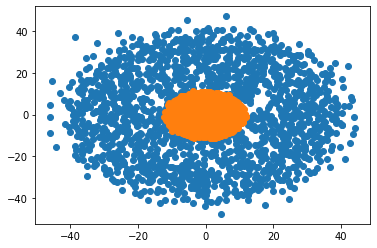

In [21]:
plt.scatter(results_M[:,0], results_M[:,1]) #first plot of data after scaling
plt.scatter(result_2_M[:,0], result_2_M[:,1]) #first plot of data without scaling

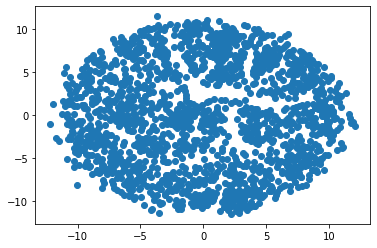

In [22]:
plt.scatter(result_2_M[:,0], result_2_M[:,1]) #first plot of data without scaling

In [23]:
MDS_morgan = pd.DataFrame(data = results_M
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
MDS_morgan.head()

,component 1,component 2
0,42.739085,-13.809057
1,-17.724302,19.605282
2,-8.096828,17.055123
3,-32.902237,-24.787535
4,-34.900730,-13.472229


In [24]:
final_MDS_morgan = pd.concat([MDS_morgan, df_morgan_MDS[['InChIKey']], df_morgan_MDS[['scaffold']]], axis = 1)
final_MDS_morgan ['scaffold'] = final_MDS_Df['scaffold'].astype(str)
df = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
final_MDS_morgan['smiles']=df['SMILES']
final_MDS_morgan ['smiles'] = final_MDS_Df['smiles'].astype(str)
final_MDS_morgan.head(5)

,component 1,component 2,InChIKey,scaffold,smiles
0,42.739085,-13.809057,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...
1,-17.724302,19.605282,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1
2,-8.096828,17.055123,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...
3,-32.902237,-24.787535,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...
4,-34.900730,-13.472229,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...


In [25]:
series = pd.value_counts(final_MDS_morgan.scaffold)
mask = (series.lt(10))
final_MDS_morgan['scaffold_grouped'] = np.where(final_MDS_morgan['scaffold'].isin(series[mask].index),'Other',final_MDS_morgan['scaffold'])

In [26]:
fig_MDS_morgan = px.scatter(final_MDS_morgan, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                     color_discrete_map= {'Other': 'lightgrey'},
                    title = 'MDS on morganfingerprint data after scaling',
                                      width=1200,
                                      height=800,
                           render_mode='SVG')
fig_MDS_morgan.update_layout(plot_bgcolor='White')
#fig_MDS_morgan.show()
app_scatter = molplotly.add_molecules(fig=fig_MDS_morgan,
                                      df=final_MDS_morgan,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9103, height=800)

In [27]:
final_MDS_morgan['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_mds_morgan2 = px.scatter(final_MDS_morgan, x="component 1", y="component 2",
                    color = "pchembl_value_Mean",#symbol='scaffold_grouped',
                   # symbol_sequence = symbols,  
                    hover_data = None ,
                    labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    color_continuous_scale=["red",  "yellow", "green"],
                    title = 'MDS on 2D descriptor data after scaling',
                                      width=1000,
                                      height=800,
                            render_mode='SVG')
fig_mds_morgan2.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_mds_morgan2,
                                      df=final_MDS_morgan,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9104, height=800)

### morgan without scaling

In [28]:
MDS_morgan_without = pd.DataFrame(data = result_2_M
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
MDS_morgan_without.head()

,component 1,component 2
0,11.907681,-0.766585
1,2.558370,1.677162
2,2.582172,6.363760
3,2.861830,-11.341604
4,8.633468,-2.169509


In [29]:
final_MDS_morgan_without = pd.concat([MDS_morgan_without, df_morgan_MDS[['InChIKey']], df_morgan_MDS[['scaffold']]], axis = 1)
final_MDS_morgan_without ['scaffold'] = final_MDS_morgan_without['scaffold'].astype(str)
#df = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
final_MDS_morgan_without['smiles']=df['SMILES']
final_MDS_morgan_without ['smiles'] = final_MDS_morgan_without['smiles'].astype(str)

final_MDS_morgan.head(5)


,component 1,component 2,InChIKey,scaffold,smiles,scaffold_grouped,pchembl_value_Mean
0,42.739085,-13.809057,AAMCCXZHVCUGJS-UHFFFAOYSA-N,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...,Other,7.89
1,-17.724302,19.605282,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,Other,5.00
2,-8.096828,17.055123,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,Other,6.19
3,-32.902237,-24.787535,ABHVKYFWPPHTHF-UHFFFAOYSA-N,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...,Other,7.20
4,-34.900730,-13.472229,ABOSMIZKCHEJEN-UHFFFAOYSA-N,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...,Other,8.46


In [30]:
series = pd.value_counts(final_MDS_morgan_without.scaffold)
mask = (series.lt(10))
final_MDS_morgan_without['scaffold_grouped'] = np.where(final_MDS_morgan_without['scaffold'].isin(series[mask].index),'Other',final_MDS_morgan_without['scaffold'])

In [31]:
fig_MDS_morgan_without = px.scatter(final_MDS_morgan_without, x="component 1", y="component 2",
                                color = "scaffold_grouped",symbol='scaffold_grouped',
                                symbol_sequence = symbols,                   
                              color_discrete_map= {'Other': 'lightgrey'},
                                title = 'MDS on morganfingerprint data without scaling',
                                width=1200,
                                height=800,
                                   render_mode='SVG')
fig_MDS_morgan_without.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_MDS_morgan_without,
                                      df=final_MDS_morgan_without,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9105, height=800)

In [32]:
final_MDS_morgan_without['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_mds_morgan2_without = px.scatter(final_MDS_morgan_without, x="component 1", y="component 2",
                    color = "pchembl_value_Mean",#symbol='scaffold_grouped',
                  # symbol_sequence = symbols,  
                    hover_data = None ,
                    labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    color_continuous_scale=["red",  "yellow", "green"],
                    title = 'MDS on morgan fingerprint data without scaling',
                                      width=1000,
                                      height=800,
                                    render_mode='SVG')
fig_mds_morgan2_without.update_layout(plot_bgcolor='White')
app_scatter = molplotly.add_molecules(fig=fig_mds_morgan2_without,
                                      df=final_MDS_morgan_without,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9106, height=800)

# MDS on pharmacophore fingerprints

In [33]:
df_MDS_PharmFp = pd.read_csv (r'C:\documenten hier\PharmacoFp_ccr2.csv')
#df_MDS_PharmFp.head()

In [34]:
features_Ph = list(df_MDS_PharmFp.columns.values)
features_Ph.remove('InChIKey')
features_Ph.remove('scaffold')
features_Ph.remove('smiles')

e = df_MDS_PharmFp.loc[ :,features_Ph].values # stores all values as numpy.ndarray
f = df_MDS_PharmFp.loc[:,['InChIKey']].values
data_Ph = pd.DataFrame(data = e, columns= features_Ph)
data_Ph.head()

,0,1,2,3,4,5,6,7,8,9,...,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mds = MDS(n_components=2, dissimilarity="euclidean")
Ph_transform = mds.fit_transform(data_Ph)

In [ ]:
print(Ph_transform)
stress = mds.stress_
print(stress) # stress is an indication for the goodness of fit, the lower the better

In [ ]:
MDS_Ph_Df = pd.DataFrame(data = Ph_transform
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
#MDS_Ph_Df.head()
final_MDS_Ph = pd.concat([MDS_Ph_Df, df_MDS_PharmFp[['InChIKey']], df_MDS_PharmFp[['scaffold']], df_MDS_PharmFp[['smiles']]], axis = 1)
final_MDS_Ph ['scaffold'] = final_MDS_Ph['scaffold'].astype(str)
final_MDS_Ph ['smiles'] = final_MDS_Ph['smiles'].astype(str)
final_MDS_Ph.head(5)

In [ ]:
series = pd.value_counts(final_MDS_Ph.scaffold)
mask = (series.lt(10))
final_MDS_Ph['scaffold_grouped'] = np.where(final_MDS_Ph['scaffold'].isin(series[mask].index),'Other',final_MDS_Ph['scaffold'])


In [ ]:
fig_MDS_Ph = px.scatter(final_MDS_Ph, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                              color_discrete_map= {'Other': 'lightgrey'},
                    title = 'MDS on pharmacophore fingerprint data without scaling',
                                      width=1200,
                                      height=800,
                       render_mode='SVG')
fig_MDS_Ph.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_MDS_Ph,
                                      df=final_MDS_Ph,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9107, height=800)

In [ ]:
final_MDS_Ph['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_MDS_Ph2 = px.scatter(final_MDS_Ph, x="component 1", y="component 2",
                        color = "pchembl_value_Mean",
                        #symbol='scaffold_grouped', symbol_sequence = symbols,  
                        hover_data = None ,
                        labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    color_continuous_scale=["red",  "yellow", "green"],
                        title = 'MDS on Pharmacophore fingerprint data without scaling',
                                      width=1000,
                                      height=800,
                        render_mode='SVG')
fig_MDS_Ph2.update_layout(plot_bgcolor='White')

app_scatter = molplotly.add_molecules(fig=fig_MDS_Ph2,
                                      df=final_MDS_Ph,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9108, height=800)

### MDS on pharmacophore fingerprints scaled data

In [ ]:
scaler = StandardScaler()
data_Ph_scaled = scaler.fit_transform(data_Ph)

In [ ]:
mds_2 = MDS(n_components=2, dissimilarity="euclidean")
Ph_scaled_transform = mds_2.fit_transform(data_Ph_scaled)

In [ ]:
print(Ph_scaled_transform)
stress_2 = mds_2.stress_
print(stress_2) 

In [ ]:
MDS_Ph_scaled = pd.DataFrame(data = Ph_scaled_transform
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
#MDS_Ph_Df.head()
final_MDS_Ph_scaled = pd.concat([MDS_Ph_scaled, df_MDS_PharmFp[['InChIKey']], df_MDS_PharmFp[['scaffold']], df_MDS_PharmFp[['smiles']]], axis = 1)
final_MDS_Ph_scaled ['scaffold'] = final_MDS_Ph_scaled['scaffold'].astype(str)
final_MDS_Ph_scaled ['smiles'] = final_MDS_Ph_scaled['smiles'].astype(str)
final_MDS_Ph_scaled.head(5)

In [ ]:
series = pd.value_counts(final_MDS_Ph_scaled.scaffold)
mask = (series.lt(10))
final_MDS_Ph_scaled['scaffold_grouped'] = np.where(final_MDS_Ph_scaled['scaffold'].isin(series[mask].index),'Other',final_MDS_Ph_scaled['scaffold'])


In [ ]:
fig_MDS_Ph_scaled = px.scatter(final_MDS_Ph_scaled, x="component 1", y="component 2",
                   color = "scaffold_grouped",symbol='scaffold_grouped',
                    symbol_sequence = symbols,                   
                              color_discrete_map= {'Other': 'lightgrey'},
                    title = 'MDS on pharmacophore fingerprint data after scaling',
                                      width=1200,
                                      height=800,
                              render_mode='SVG')

app_scatter = molplotly.add_molecules(fig=fig_MDS_Ph_scaled,
                                      df=final_MDS_Ph_scaled,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9109, height=800)

In [ ]:
final_MDS_Ph_scaled['pchembl_value_Mean'] = df['pchembl_value_Mean']
fig_MDS_Ph2_scaled = px.scatter(final_MDS_Ph_scaled, x="component 1", y="component 2",
                        color = "pchembl_value_Mean",
                        #symbol='scaffold_grouped', symbol_sequence = symbols,  
                        hover_data = None ,
                        labels={'component 1': 'component 1',
                            'component 2': 'component 2',
                            'pchembl_value_Mean': 'Activity'},
                    color_continuous_scale=["red",  "yellow", "green"],
                        title = 'MDS on Pharmacophore fingerprint data after scaling',
                                      width=1000,
                                      height=800,
                               render_mode='SVG')


app_scatter = molplotly.add_molecules(fig=fig_MDS_Ph2_scaled,
                                      df=final_MDS_Ph_scaled,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9110, height=800)

## MDS on learned descriptor data

In [13]:
df_learned = pd.read_csv (r'C:\documenten hier\smiles_1482_ccr2_2.csv')
df_learned.head()

,smiles,new_smiles,cddd_1,cddd_2,cddd_3,cddd_4,cddd_5,cddd_6,cddd_7,cddd_8,...,cddd_505,cddd_506,cddd_507,cddd_508,cddd_509,cddd_510,cddd_511,cddd_512,Activity,InChIKey
0,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,0.451738,0.574400,0.112859,0.058107,-0.211912,-0.684652,-0.605549,0.346793,...,-0.125112,-0.039612,-0.993693,0.284359,-0.163784,-0.391925,-0.373108,0.276012,5.000,AANWVQVQZDEWDD-UHFFFAOYSA-N
1,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,-0.902936,0.338289,-0.089829,0.297057,0.165143,0.034665,-0.220617,-0.107172,...,-0.221622,-0.095471,-0.999081,-0.202076,-0.170638,-0.239126,0.386398,0.612926,6.190,AAZMPANXGYITPF-UHFFFAOYSA-N
2,O=C(CNC(=O)c1cc(OC(F)(F)F)ccc1)NC1CCN(Cc2ccc(C...,O=C(CNC(=O)c1cccc(OC(F)(F)F)c1)NC1CCN(Cc2ccc(C...,-0.852346,0.490854,-0.074181,0.496300,0.526191,-0.478252,0.071138,-0.295008,...,-0.406049,-0.199758,-0.996681,0.279550,-0.344650,-0.336218,0.367996,0.414955,6.398,ABSDATGZYRKKAQ-UHFFFAOYSA-N
3,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,-0.907761,-0.389732,-0.421162,-0.542837,-0.042211,-0.503789,0.198389,-0.039144,...,-0.760867,0.620664,-0.999571,0.647168,-0.537615,0.634854,0.615865,0.242375,7.195,ABWDLWYDMCTIDD-UHFFFAOYSA-N
4,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,-0.873453,0.252932,0.112824,0.263079,-0.000688,-0.383503,-0.003180,-0.123824,...,0.065709,-0.773202,-0.999751,-0.112950,-0.571104,0.127560,0.304943,-0.393014,8.165,ACFBGSHYQKWEDV-UHFFFAOYSA-N


In [14]:
data_learned = df_learned.drop(['InChIKey', 'smiles', 'new_smiles', 'Activity'], axis=1)
data_learned.head()

,cddd_1,cddd_2,cddd_3,cddd_4,cddd_5,cddd_6,cddd_7,cddd_8,cddd_9,cddd_10,...,cddd_503,cddd_504,cddd_505,cddd_506,cddd_507,cddd_508,cddd_509,cddd_510,cddd_511,cddd_512
0,0.451738,0.574400,0.112859,0.058107,-0.211912,-0.684652,-0.605549,0.346793,0.186300,-0.054652,...,-0.200742,-0.442978,-0.125112,-0.039612,-0.993693,0.284359,-0.163784,-0.391925,-0.373108,0.276012
1,-0.902936,0.338289,-0.089829,0.297057,0.165143,0.034665,-0.220617,-0.107172,-0.139591,-0.080506,...,-0.463660,-0.603165,-0.221622,-0.095471,-0.999081,-0.202076,-0.170638,-0.239126,0.386398,0.612926
2,-0.852346,0.490854,-0.074181,0.496300,0.526191,-0.478252,0.071138,-0.295008,0.418911,-0.321729,...,-0.395183,-0.799093,-0.406049,-0.199758,-0.996681,0.279550,-0.344650,-0.336218,0.367996,0.414955
3,-0.907761,-0.389732,-0.421162,-0.542837,-0.042211,-0.503789,0.198389,-0.039144,-0.327959,-0.539845,...,-0.496701,0.047690,-0.760867,0.620664,-0.999571,0.647168,-0.537615,0.634854,0.615865,0.242375
4,-0.873453,0.252932,0.112824,0.263079,-0.000688,-0.383503,-0.003180,-0.123824,0.042089,-0.210269,...,-0.040036,0.249029,0.065709,-0.773202,-0.999751,-0.112950,-0.571104,0.127560,0.304943,-0.393014


In [15]:
scaler = StandardScaler()  # not sure if Standard scaler of minmaxScaler should be used, standardscaler seems to make the data more compact. 
data_learned_scaled = scaler.fit_transform(data_learned)

In [16]:
mds = MDS(n_components=2, dissimilarity="euclidean")
MDS_learned_scaled = mds.fit_transform(data_learned_scaled)
MDS_learned = mds.fit_transform(data_learned)


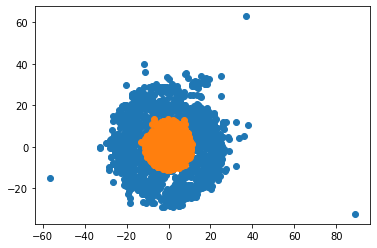

In [17]:
plt.scatter(MDS_learned_scaled[:,0], MDS_learned_scaled[:,1]) #first plot of data after scaling
plt.scatter(MDS_learned[:,0], MDS_learned[:,1]) #first plot of data without scaling

In [18]:
MDS_learned_Df = pd.DataFrame(data = MDS_learned_scaled
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
MDS_learned_Df.head()

,component 1,component 2
0,-11.443463,18.465560
1,-3.160675,-3.101479
2,-2.451875,2.981219
3,13.146845,-22.779091
4,-26.142510,1.772793


In [19]:
finalDf_learned = pd.concat([MDS_learned_Df, df_learned[['InChIKey']], df_learned[['new_smiles']], df_learned[['smiles']], df_learned[['Activity']]], axis = 1)
finalDf_learned['new_smiles'] = finalDf_learned['new_smiles'].astype(str)
finalDf_learned['smiles'] = finalDf_learned['smiles'].astype(str)
finalDf_learned.head(5)

,component 1,component 2,InChIKey,new_smiles,smiles,Activity
0,-11.443463,18.465560,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,5.000
1,-3.160675,-3.101479,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,6.190
2,-2.451875,2.981219,ABSDATGZYRKKAQ-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(OC(F)(F)F)c1)NC1CCN(Cc2ccc(C...,O=C(CNC(=O)c1cc(OC(F)(F)F)ccc1)NC1CCN(Cc2ccc(C...,6.398
3,13.146845,-22.779091,ABWDLWYDMCTIDD-UHFFFAOYSA-N,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,7.195
4,-26.142510,1.772793,ACFBGSHYQKWEDV-UHFFFAOYSA-N,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,8.165


In [20]:
finalDf_learned["mol"] = finalDf_learned.apply(lambda row: Chem.MolFromSmiles(row['new_smiles']), axis=1)
finalDf_learned["scaffold"] = finalDf_learned.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_learned['scaffold'] = finalDf_learned['scaffold'].astype(str)
finalDf_learned.head()

,component 1,component 2,InChIKey,new_smiles,smiles,Activity,mol,scaffold
0,-11.443463,18.465560,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,5.000,<rdkit.Chem.rdchem.Mol object at 0x000001B7A1E...,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1
1,-3.160675,-3.101479,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,6.190,<rdkit.Chem.rdchem.Mol object at 0x000001B7A1E...,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1
2,-2.451875,2.981219,ABSDATGZYRKKAQ-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(OC(F)(F)F)c1)NC1CCN(Cc2ccc(C...,O=C(CNC(=O)c1cc(OC(F)(F)F)ccc1)NC1CCN(Cc2ccc(C...,6.398,<rdkit.Chem.rdchem.Mol object at 0x000001B7A1E...,O=C(CNC(=O)c1ccccc1)NC1CCN(Cc2ccccc2)C1
3,13.146845,-22.779091,ABWDLWYDMCTIDD-UHFFFAOYSA-N,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,COC1COCCC1N(C)C1CC2CCCC2(C(=O)N2CC3CC2CN3c2cc(...,7.195,<rdkit.Chem.rdchem.Mol object at 0x000001B7A1E...,O=C(N1CC2CC1CN2c1ccccc1)C12CCCC1CC(NC1CCOCC1)C2
4,-26.142510,1.772793,ACFBGSHYQKWEDV-UHFFFAOYSA-N,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,CCCC(O)C(CNCc1ccc(C)cc1C)NC(=O)CNC(=O)c1cc(C(F...,8.165,<rdkit.Chem.rdchem.Mol object at 0x000001B7A1E...,O=C(CNC(=O)c1ccccc1)NCCNCc1ccccc1


In [21]:
# The following code was used to make sure the same scaffold groups are formed as in the previous depictions. 
namelist = final_MDS_Df['scaffold_grouped'].tolist()
namelist_unique = np.unique(namelist)

namelist2 = finalDf_learned['scaffold'].tolist()
for i in range(len(namelist2)):
    if namelist2[i] not in namelist_unique:
        namelist2[i] = 'Other'
finalDf_learned['scaffold_grouped'] = namelist2
print(namelist_unique) 

['C1=CC(c2ccccc2)CCC1' 'O=C(C1CCC(NC2CCOCC2)C1)N1CC2CC1CN2'
 'O=C(C1CCC(NC2CCOCC2)C1)N1CCN(c2ccccn2)CC1'
 'O=C(C1CCC(NC2CCc3ccccc32)C1)N1CCc2ccccc2C1'
 'O=C(C=Cc1ccccc1)N1CCC(CN2CCC(c3c[nH]c4ccccc34)CC2)CC1'
 'O=C(C=Cc1ccccc1)N1CCC(CN2CCC(c3ccccc3)CC2)CC1'
 'O=C(C=Cc1ccccc1)N1CCC(CNC2CCC(c3c[nH]c4ccccc34)CC2)CC1'
 'O=C(C=Cc1ccccc1)NCCCCCN1CCC(c2c[nH]c3ccccc23)CC1'
 'O=C(CC(=O)Nc1ccccc1)NCCNCc1ccccc1'
 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1CS(=O)(=O)c1ccccc1'
 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1NC(=O)c1ccccc1'
 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1NCc1ccccc1'
 'O=C(CNC(=O)c1ccccc1)NC1CCN(CCC2CCN(C(=O)c3ccccc3)CC2)C1'
 'O=C(CNC(=O)c1ccccc1)NC1CCN(CCN2CCN(C(=O)c3ccccc3)CC2)C1'
 'O=C(CNC(=O)c1ccccc1)NC1CCN(Cc2ccccc2)C1'
 'O=C(CNC(=O)c1ccccc1)NC1CN(C2CCC(c3ccccc3)CC2)C1'
 'O=C(CNC(=O)c1ccccc1)NC1CN(C2CCC(c3cccnc3)CC2)C1'
 'O=C(CNC(=O)c1ccccc1)NC1CNCCC1NCc1ccccc1'
 'O=C(CNC(=O)c1ccccc1)NCCNCc1ccccc1'
 'O=C(CNc1n[nH]c2ccccc12)NC1CN(C2CCCCC2)C1'
 'O=C(Cc1nc2ccccc2[nH]1)NC1CCCCC1CS(=O)(=O)c1ccccc1'
 'O=C(N1CC2CC1C

In [29]:
fig_learned = px.scatter(finalDf_learned, x="component 1", y="component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                                       category_orders={"scaffold_grouped": ['Other', 'O=C(CNC(=O)c1ccccc1)NC1CCN(Cc2ccccc2)C1', 'O=C(N1CC2CC1CN2c1ccccc1)C12CCCC1CC(NC1CCOCC1)C2', 'O=C(CNC(=O)c1ccccc1)NCCNCc1ccccc1', 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1CS(=O)(=O)c1ccccc1', 
'O=C(C=Cc1ccccc1)N1CCC(CN2CCC(c3c[nH]c4ccccc34)CC2)CC1'
, 'O=C(CNC(=O)c1ccccc1)NC1CCN(CCC2CCN(C(=O)c3ccccc3)CC2)C1', 'O=C(CNc1n[nH]c2ccccc12)NC1CN(C2CCCCC2)C1', 'O=C(Nc1ccc(C[NH2+]C2CCOCC2)cc1)c1ccccc1', 'O=S(=O)(Nc1ccccc1Oc1ccccc1)c1ccccc1', 'O=C(NCc1ccccc1)C1CCC(N2CCC3(C=Cc4ccccc43)CC2)C1', 'O=C(C=Cc1ccccc1)N1CCC(CN2CCC(c3ccccc3)CC2)CC1', 'O=C(C1CCC(NC2CCc3ccccc32)C1)N1CCc2ccccc2C1', 'O=C(Cc1nc2ccccc2[nH]1)NC1CCCCC1CS(=O)(=O)c1ccccc1', 'O=C(N1CCc2ncccc2C1)C12CNCC1CC(NC1CCOCC1)C2','C1=CC(c2ccccc2)CCC1' , 'c1ccc(Cn2ccc3ccccc32)cc1', 'O=C(C=Cc1ccccc1)N1CCC(CNC2CCC(c3c[nH]c4ccccc34)CC2)CC1', 'c1ccc(CN2CCCN(CCC(c3ccccc3)c3ccccc3)CC2)cc1', 'O=C1c2ccnc(Nc3ccccc3)c2CCCN1CCCN1CCCCC1', 'O=C(NCc1ccccc1)C1CCC(NC2CCOCC2)C1', 'O=C(Nc1ccccc1)N1CCC(CNC2CCC(c3c[nH]c4ccccc34)CC2)CC1', 'O=C(C1CCC(NC2CCOCC2)C1)N1CC2CC1CN2', 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1NCc1ccccc1', 'O=C(CNC(=O)c1ccccc1)NC1CN(C2CCC(c3cccnc3)CC2)C1', 'O=C(NC1CCN(C2CCCCC2)C1=O)c1ccccc1', 'O=S(=O)(Nc1ccccc1Cn1ccnn1)c1ccccc1', 'O=C(C1CCC(NC2CCOCC2)C1)N1CCN(c2ccccn2)CC1', 'O=C(N1CC2CC1CN2c1ccccn1)C12CCCC1CC(NC1CCOCC1)C2', 'O=C(C=Cc1ccccc1)NCCCCCN1CCC(c2c[nH]c3ccccc23)CC1', 'O=C(Nc1ccccc1)N1CCN(CC2CCCN(C3CC3)C2)CC1', 'O=C(Nc1nccs1)N1CCN(C(=O)C2CNCCN2)CC1', 'c1ccc(CN2CCCC(Nc3ccc4[nH]ncc4c3)C2)cc1', 'O=C(N1CCc2ncccc2C1)C12CCCC1CC(NC1CCOCC1)C2', 'O=C(CC(=O)Nc1ccccc1)NCCNCc1ccccc1', 'c1ccc(-c2ccn(-c3ccc4ccccc4c3)n2)cc1', 'O=C(Nc1ccccc1)N1CCC(CN2CCC(c3c[nH]c4ccccc34)CC2)CC1', 'O=C(CNC(=O)c1ccccc1)NC1CN(C2CCC(c3ccccc3)CC2)C1', 'O=C(NCc1ccccc1)C(CCN1CCC(c2ccccc2)CC1)c1cscn1', 
'O=C(CNC(=O)c1ccccc1)NC1CNCCC1NCc1ccccc1', 'O=C(CNC(=O)c1ccccc1)NC1CCN(CCN2CCN(C(=O)c3ccccc3)CC2)C1', 'O=C(CNC(=O)c1ccccc1)NC1CCCCC1NC(=O)c1ccccc1']
},    
                   # size = "Activity",
                    title = 'MDS on learned descriptor data after scaling',
                                      width=1200,
                                      height=800,render_mode='SVG')
fig_learned.update_layout(plot_bgcolor='White')
#fig_learned.show()
app_scatter = molplotly.add_molecules(fig=fig_learned,
                                     df=finalDf_learned,
                                    smiles_col='smiles',
                                   title_col='InChIKey',
                                  condition_col = 'scaffold_grouped')
                                                                     
app_scatter.run_server(mode='inline', port=9111, height=800)


In [27]:
fig_learned_2 = px.scatter(finalDf_learned, x="component 1", y="component 2",
                    color = "Activity",
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                                        
                    title = 'MDS on learned descriptor data after scaling',
                                      width=800,
                                      height=800,
                          render_mode='SVG',
                          #symbol='scaffold_grouped',    symbol_sequence = symbols
                          )
fig_learned_2.update_layout(plot_bgcolor='White')
#fig_learned_2.show()
app_scatter = molplotly.add_molecules(fig=fig_learned_2,
                                      df=finalDf_learned,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                     
app_scatter.run_server(mode='inline', port=9112, height=800)

## MDS on mordred 3D descriptor data

In [32]:
df_3D_desc = pd.read_csv (r'C:\documenten hier\Data\ccr2_3D_descriptor_10.csv')
df_3D_desc.head()

,Mor18se,Mor28se,FNSA4,Mor25m,Mor17m,Mor02v,Mor04p,DPSA2,Mor16se,Mor26se,...,MOMI-Y,Mor22,Mor13m,Mor24,Mor03v,MOMI-X,WNSA2,WPSA3,Mor16p,InChIKey
0,-1.869649,-0.243205,-0.022945,0.429884,-0.487768,41.319735,-0.168940,4033.827050,0.120474,0.616993,...,17712.364855,-0.798212,-1.353180,0.821284,-6.477560,26611.749270,-2070.818036,31.696348,-0.338572,AAMCCXZHVCUGJS-UHFFFAOYSA-N
1,-1.227329,0.103371,-0.027871,1.027606,0.081714,26.858627,-0.011030,1566.137042,0.776976,0.459749,...,9752.562456,-0.242301,-1.125111,-0.337082,-2.824239,10224.209154,-441.358001,19.943251,0.449081,AANWVQVQZDEWDD-UHFFFAOYSA-N
2,-1.944491,-0.060753,-0.021324,0.439972,-0.548351,33.679696,1.363876,2522.612207,-0.191598,-0.216521,...,20081.250406,0.522718,-2.025899,-0.184984,-5.904425,20491.094834,-804.702820,23.447055,-0.377155,AAZMPANXGYITPF-UHFFFAOYSA-N
3,-2.328573,-0.983776,-0.013995,0.510891,-1.068032,39.037049,-2.563579,3686.578602,-0.589315,1.370304,...,11356.085558,-1.233024,-2.510010,-0.126427,-7.856627,19653.678402,-924.552303,29.346699,-0.589531,ABHVKYFWPPHTHF-UHFFFAOYSA-N
4,-1.088321,-0.343119,-0.024440,0.203542,-0.940027,41.797619,0.981399,3285.685398,0.374478,-0.147478,...,20442.206199,0.231653,-2.159142,0.007601,-7.933098,23782.810282,-1636.178608,18.081601,-0.378472,ABOSMIZKCHEJEN-UHFFFAOYSA-N


In [33]:
data_3D = df_3D_desc.drop(['InChIKey'], axis=1)
data_3D_scaled = StandardScaler().fit_transform(data_3D)


In [34]:
mds = MDS(n_components=2, dissimilarity="euclidean")
MDS_3D_scaled = mds.fit_transform(data_3D_scaled)
MDS_3D = mds.fit_transform(data_3D)

 #### after scaling data

In [35]:
MDS_3D_Df_scaled = pd.DataFrame(data = MDS_3D_scaled
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components
MDS_3D_Df_scaled.head()

,component 1,component 2
0,9.841145,22.935198
1,-17.086085,5.368386
2,0.426187,7.485204
3,20.442506,4.871150
4,14.981729,11.798374


In [37]:
df_ccr2 = pd.read_csv (r'C:\documenten hier\Data\ccr2_data.csv')
finalDf_3D_scaled = pd.concat([MDS_3D_Df_scaled, df_3D_desc[['InChIKey']]], axis = 1)
finalDf_3D_scaled['smiles'] = df_ccr2['SMILES']
finalDf_3D_scaled['smiles'] = finalDf_3D_scaled['smiles'].astype(str)
finalDf_3D_scaled['Activity'] = df_ccr2['pchembl_value_Mean']

finalDf_3D_scaled.head(5)

,component 1,component 2,InChIKey,smiles,Activity
0,9.841145,22.935198,AAMCCXZHVCUGJS-UHFFFAOYSA-N,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...,7.89
1,-17.086085,5.368386,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,5.00
2,0.426187,7.485204,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,6.19
3,20.442506,4.871150,ABHVKYFWPPHTHF-UHFFFAOYSA-N,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...,7.20
4,14.981729,11.798374,ABOSMIZKCHEJEN-UHFFFAOYSA-N,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...,8.46


In [38]:
finalDf_3D_scaled["mol"] = finalDf_3D_scaled.apply(lambda row: Chem.MolFromSmiles(row['smiles']), axis=1)
finalDf_3D_scaled["scaffold"] = finalDf_3D_scaled.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_3D_scaled['scaffold'] = finalDf_3D_scaled['scaffold'].astype(str)

#group compounds with the same scaffold
series = pd.value_counts(finalDf_3D_scaled.scaffold)
mask = (series.lt(10))
finalDf_3D_scaled['scaffold_grouped'] = np.where(finalDf_3D_scaled['scaffold'].isin(series[mask].index),'Other',finalDf_3D_scaled['scaffold'])

finalDf_3D_scaled.head()

,component 1,component 2,InChIKey,smiles,Activity,mol,scaffold,scaffold_grouped
0,9.841145,22.935198,AAMCCXZHVCUGJS-UHFFFAOYSA-N,CC1CN(CCC(C(=O)NCc2cc(C(F)(F)F)cc(C(F)(F)F)c2)...,7.89,<rdkit.Chem.rdchem.Mol object at 0x000001B7A5E...,O=C(Cc1ccccn1)Nc1nc(C(CCN2CCC3(C=Cc4ccccc43)CC...,Other
1,-17.086085,5.368386,AANWVQVQZDEWDD-UHFFFAOYSA-N,O=C(NC(=O)c1cc2c(cc1)OCO2)Nc1cc(-c2ccccc2)ccc1,5.00,<rdkit.Chem.rdchem.Mol object at 0x000001B7A5E...,O=C(NC(=O)c1ccc2c(c1)OCO2)Nc1cccc(-c2ccccc2)c1,Other
2,0.426187,7.485204,AAZMPANXGYITPF-UHFFFAOYSA-N,O=C(CNC(=O)c1cccc(C(F)(F)F)c1)NC1CN(C2CCN(c3cc...,6.19,<rdkit.Chem.rdchem.Mol object at 0x000001B7A5E...,O=C(CNC(=O)c1ccccc1)NC1CCN(C2CCN(c3ccccc3)CC2)C1,Other
3,20.442506,4.871150,ABHVKYFWPPHTHF-UHFFFAOYSA-N,COC1COCCC1NC1CC2CN(C(=O)OCCN3CCOCC3)CC2(C(=O)N...,7.20,<rdkit.Chem.rdchem.Mol object at 0x000001B7A5E...,O=C(OCCN1CCOCC1)N1CC2CC(NC3CCOCC3)CC2(C(=O)N2C...,Other
4,14.981729,11.798374,ABOSMIZKCHEJEN-UHFFFAOYSA-N,CC(C)N(C)C1CCC(N2CCC(NC(=O)c3cc(C(F)(F)F)cc(C(...,8.46,<rdkit.Chem.rdchem.Mol object at 0x000001B7A5E...,O=C(NC1CCN(C2CCCCC2CS(=O)(=O)c2ccccc2)C1=O)c1c...,Other


In [39]:
fig_3D_scaled = px.scatter(finalDf_3D_scaled, x="component 1", y="component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                   # size = "Activity",
                    title = 'MDS on 3D descriptor data after scaling',
                                      width=1000,
                                      height=800,render_mode='SVG')
fig_3D_scaled.update_layout(plot_bgcolor='White')
#fig_3D_scaled.show()
app_scatter = molplotly.add_molecules(fig=fig_3D_scaled,
                                      df=finalDf_3D_scaled,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9113, height=800)

In [40]:
fig_3D_scaled_2 = px.scatter(finalDf_3D_scaled, x="component 1", y="component 2",
                    color = "Activity",
                      color_continuous_scale=["red",  "yellow", "green"],
                    hover_data = None ,
                                        
                    title = 'MDS on 3D descriptor data after scaling',
                                      width=1200,
                                      height=800,
                          render_mode='SVG',
                          #symbol='scaffold_grouped',    symbol_sequence = symbols
                          )
fig_3D_scaled_2.update_layout(plot_bgcolor='White')
#fig_3D_scaled_2.show()
app_scatter = molplotly.add_molecules(fig=fig_3D_scaled_2,
                                      df=finalDf_3D_scaled,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9114, height=800)

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
IndexError: list index out of range

-------------------------------------------------------

#### MDS without scaling

In [ ]:
MDS_3D_Df = pd.DataFrame(data = MDS_3D
             , columns = ['component 1', 'component 2']) # create new dataframe containing the two components

df_ccr2 = pd.read_csv (r'C:\documenten hier\ccr2_data.csv')
finalDf_3D = pd.concat([MDS_3D_Df, df_3D_desc[['InChIKey']]], axis = 1)
finalDf_3D['smiles'] = df_ccr2['SMILES']
finalDf_3D['smiles'] = finalDf_3D['smiles'].astype(str)
finalDf_3D['Activity'] = df_ccr2['pchembl_value_Mean']

finalDf_3D["mol"] = finalDf_3D.apply(lambda row: Chem.MolFromSmiles(row['smiles']), axis=1)
finalDf_3D["scaffold"] = finalDf_3D.apply(lambda row: Chem.MolToSmiles(MurckoScaffold.GetScaffoldForMol(row['mol'])), axis=1)
finalDf_3D['scaffold'] = finalDf_3D['scaffold'].astype(str)

#group compounds with the same scaffold
series = pd.value_counts(finalDf_3D.scaffold)
mask = (series.lt(10))
finalDf_3D['scaffold_grouped'] = np.where(finalDf_3D['scaffold'].isin(series[mask].index),'Other',finalDf_3D['scaffold'])

finalDf_3D.head()

In [ ]:
fig_3D_without = px.scatter(finalDf_3D, x="component 1", y="component 2",
                    color = "scaffold_grouped", symbol='scaffold_grouped',
                    symbol_sequence = symbols,
                    hover_data = None ,
                    color_discrete_map= {'Other': 'lightgrey'
                                         },
                   # size = "Activity",
                    title = 'MDS on 3D descriptor data without scaling',
                                      width=1000,
                                      height=800,render_mode='SVG')
#fig_3D_without.show()
app_scatter = molplotly.add_molecules(fig=fig_3D_without,
                                      df=finalDf_3D,
                                      smiles_col='smiles',
                                      title_col='InChIKey',
                                      condition_col = 'scaffold_grouped')
                                                                          
app_scatter.run_server(mode='inline', port=9115, height=800)